In [3]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cbpro

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install dataclasses

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import json
import pandas_ta as ta
import cbpro
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
api_key = 'b530f8d3d0c88c44c63300fdfcdede40'
api_secret = 'WS9U7h4ZCLS/3nAiMqtbWWzlYWmcE57AlvZ9bsoW60eCuIiGTcEt1FVQfnD91vWPVUj6icvRjRGAlUtqe187HQ=='
api_passphrase = 'pickysandbox'

In [18]:
public_client = cbpro.PublicClient() #opens a client to query PUBLIC coinbase api

In [28]:
df = pd.read_json(json.dumps(public_client.get_product_historic_rates('BTC-USD', granularity=900))) #Granularity choices: 60 (minute), 300 (5 minutes), 900 (15 mintes), 3600 (1 hour), 21600 (6 hours), 86400 (1 day)

In [30]:
df.columns = ['time', 'low', 'high', 'open', 'close', 'volume'] #label columns
df_time = df["time"]
df_low = df["low"]
df_high = df["high"]
df_open = df["open"]
df_close = df["close"]
df_volume = df["volume"]

In [31]:
rsi = ta.rsi(df_close, 14)
sma50 = ta.sma(df_close, 50)

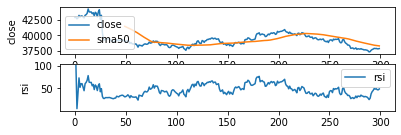

In [32]:
ax1 = plt.subplot(411)
plt.plot(df_close, label="close")
plt.plot(sma50, label="sma50")
plt.legend()
plt.xlabel('time')
plt.ylabel('close')

plt.subplot(412, sharex=ax1)
plt.plot(rsi, label="rsi")
plt.legend()
plt.ylabel('rsi')

plt.show()

In [34]:
class TextWebsocketClient(cbpro.WebsocketClient):
    def on_open(self):
        self.url = 'wss://ws-feed-public.sandbox.pro.coinbase.com'
        self.message_count = 0
        
    def on_message(self,msg):
        self.message_count += 1
        msg_type = msg.get('type',None)
        if msg_type == 'ticker':
            time_val = msg.get('time',('-'*27))
            price_val = msg.get('price',None)
            price_val = float(price_val) if price_val is not None else 'None'
            product_id = msg.get('product_id',None)

            print(f"{time_val:30} {price_val:.3f} {product_id}\tchannel type:{msg_type}")
        
    def on_close(self):
        print(f"<---Websocket connection closed--->\n\tTotal messages: {self.message_count}")

In [35]:
stream = TextWebsocketClient(products=['BTC-USD'],channels=['ticker'])
stream.start()

2021-02-08T19:29:44.814070Z    42976.300 BTC-USD	channel type:ticker
2021-02-08T19:29:45.166868Z    42976.300 BTC-USD	channel type:ticker
2021-02-08T19:29:47.554460Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:48.108863Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:48.642797Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:49.193015Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:50.170721Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:50.584255Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:54.451656Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:54.728401Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:55.152225Z    42976.300 BTC-USD	channel type:ticker
2021-02-08T19:29:55.177757Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:55.312534Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:56.655248Z    42976.320 BTC-USD	channel type:ticker
2021-02-08T19:29:56.811878Z    429

In [37]:
stream.close()

2021-02-08T19:31:59.364334Z    43063.030 BTC-USD	channel type:ticker
<---Websocket connection closed--->
	Total messages: 94
